In [15]:
from nltk.corpus import movie_reviews
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fileids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

In [5]:
np.random.seed(7)
tf.random.set_seed(7)

In [6]:
max_words = 10000
maxlen = 500

In [8]:
tokenizer = Tokenizer(num_words=max_words, oov_token='UNK')
tokenizer.fit_on_texts(reviews)
X = tokenizer.texts_to_sequences(reviews)
X = pad_sequences(X, maxlen=maxlen, truncating='pre')

In [9]:
label_dict = {'pos':0, 'neg':1}
y = np.array([label_dict[c] for c in categories])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [12]:
model = Sequential([
    Embedding(max_words, 64, input_length=maxlen), 
    Conv1D(128,
            5,
            padding='valid', 
            activation='relu',
            strides=1), 
    MaxPooling1D(),
    Conv1D(256,
            5,
            padding='valid', 
            activation='relu',
            strides=1), 
    MaxPooling1D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           640000    
                                                                 
 conv1d (Conv1D)             (None, 496, 128)          41088     
                                                                 
 max_pooling1d (MaxPooling1  (None, 248, 128)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 244, 256)          164096    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 122, 256)          0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 31232)             0

In [14]:
adam = Adam(learning_rate=1e-3)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=20,
                    batch_size=256,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 3s 402ms/step - loss: 0.7041 - acc: 0.5117 - val_loss: 0.6944 - val_acc: 0.4969
Epoch 2/20
5/5 [==============================] - 2s 361ms/step - loss: 0.6931 - acc: 0.4969 - val_loss: 0.6928 - val_acc: 0.4969
Epoch 3/20
5/5 [==============================] - 2s 364ms/step - loss: 0.6920 - acc: 0.6500 - val_loss: 0.6921 - val_acc: 0.5250
Epoch 4/20
5/5 [==============================] - 2s 361ms/step - loss: 0.6901 - acc: 0.5320 - val_loss: 0.6912 - val_acc: 0.5375
Epoch 5/20
5/5 [==============================] - 2s 365ms/step - loss: 0.6857 - acc: 0.5617 - val_loss: 0.6901 - val_acc: 0.5344
Epoch 6/20
5/5 [==============================] - 2s 359ms/step - loss: 0.6747 - acc: 0.6859 - val_loss: 0.6844 - val_acc: 0.5844
Epoch 7/20
5/5 [==============================] - 2s 361ms/step - loss: 0.6396 - acc: 0.8320 - val_loss: 0.6551 - val_acc: 0.6406
Epoch 8/20
5/5 [==============================] - 2s 370ms/step - loss: 0.5411 - acc: 0.82

In [16]:
def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

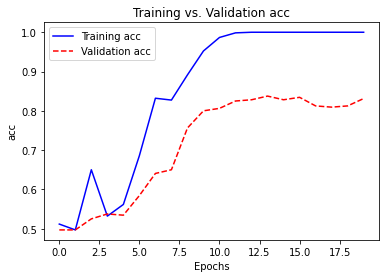

In [17]:
plot_results(history, 'acc')

In [18]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 0s 15ms/step - loss: 0.7232 - acc: 0.8225


[0.7232261896133423, 0.8224999904632568]